In [50]:
import pandas as pd
from pathlib import Path
import math
import random

In [51]:
code_dir = Path('.')
ipt_dir = Path(code_dir, '../in')
otpt_dir = Path(code_dir, '../out')

In [52]:
kibou_lists = []
for path in ipt_dir.iterdir():
    kibou_lists.append(pd.read_excel(path.resolve()))

In [53]:
kibou_lists = [pddf.fillna(0) for pddf in kibou_lists]

In [54]:
# 当直回数のカウンター
n_days = kibou_lists[0].shape[0]
counter_dict = {'勝木':math.floor(n_days/3), 
                '根岸':0,
                '大津':0}
counter_dict

{'勝木': 10, '根岸': 0, '大津': 0}

In [55]:
counter_dict['根岸'] = math.ceil((n_days - counter_dict['勝木'])*2/3)
counter_dict

{'勝木': 10, '根岸': 14, '大津': 0}

In [56]:
counter_dict['大津'] = n_days - counter_dict['勝木'] - counter_dict['根岸']
counter_dict

{'勝木': 10, '根岸': 14, '大津': 7}

In [57]:
# 休みのカウンター
yasumi_dict =  {'勝木':0,
                '根岸':0,
                '大津':0}

In [58]:
result = pd.DataFrame({'日付':kibou_lists[0]['日付'], 
                       '担当':'いません'})

In [59]:
# まずは希望のある日から埋める
for date in range(result.shape[0]):
    # 候補の作成
    kouho = []
    for df in kibou_lists:
        hito = df.loc[0, '名前']
        if df.loc[date, '希望日'] == 1 and counter_dict[hito] > 0:
            kouho.append(hito)
    
    # 候補がいれば埋める
    if len(kouho) > 0:
        tantou = random.choice(kouho)
        result.loc[date,'担当'] = tantou
        counter_dict[tantou] = counter_dict[tantou] - 1

        # 休日だったらカウンター増やす
        if (kibou_lists[0].loc[date, '土日'] == 1 or 
            kibou_lists[0].loc[date, '祝日'] == 1):
            yasumi_dict[tantou] = yasumi_dict[tantou] + 1

result

,日付,担当
0,2021-07-01,いません
1,2021-07-02,いません
2,2021-07-03,いません
3,2021-07-04,いません
4,2021-07-05,いません
5,2021-07-06,いません
6,2021-07-07,勝木
7,2021-07-08,いません
8,2021-07-09,いません
9,2021-07-10,勝木


In [61]:
# 次に休日を埋める
for date in range(result.shape[0]):
    is_kyujitsu = (kibou_lists[0].loc[date, '土日'] == 1 or 
                    kibou_lists[0].loc[date, '祝日'] == 1)
    # 埋まっていない休日を埋める
    if (is_kyujitsu and 
        result.loc[date, '担当'] == 'いません'):
        # 候補の作成
        # 休日が最小の人を優先して候補にする
        kouho = []
        kyujitsu_min = pd.Series(yasumi_dict).min()

        for df in kibou_lists:
            hito = df.loc[0, '名前']
            if (df.loc[date, '不希望日'] == 0 and 
                counter_dict[hito] > 0 and
                yasumi_dict[hito] == kyujitsu_min):
                kouho.append(hito)

            if date > 0 and (result.loc[date - 1, '担当'] in kouho):
                kouho.remove(result.loc[date - 1, '担当'])

            if date != n_days -1 and (result.loc[date + 1, '担当'] in kouho):
                kouho.remove(result.loc[date + 1, '担当'])
        
        # 候補がいれば埋める
        if len(kouho) > 0:
            tantou = random.choice(kouho)
            result.loc[date,'担当'] = tantou
            counter_dict[tantou] = counter_dict[tantou] - 1

            yasumi_dict[tantou] = yasumi_dict[tantou] + 1

result

,日付,担当
0,2021-07-01,いません
1,2021-07-02,いません
2,2021-07-03,大津
3,2021-07-04,根岸
4,2021-07-05,いません
5,2021-07-06,いません
6,2021-07-07,勝木
7,2021-07-08,いません
8,2021-07-09,いません
9,2021-07-10,勝木


In [62]:
yasumi_dict

{'勝木': 3, '根岸': 3, '大津': 3}

In [12]:
# 残りの日を埋める
for date in range(result.shape[0]):
    if result.loc[date, '担当'] == 'いません':
        # 候補の作成
        kouho = []
        counter_max = pd.Series(counter_dict).max()

        for df in kibou_lists:
            hito = df.loc[0, '名前']
            if (df.loc[date, '不希望日'] == 0 and 
                counter_dict[hito] > 0 and
                counter_dict[hito] == counter_max):
                kouho.append(hito)
        
        # 候補がいれば埋める
        if len(kouho) > 0:
            tantou = random.choice(kouho)
            result.loc[date,'担当'] = tantou
            counter_dict[tantou] = counter_dict[tantou] - 1

result

,日付,担当
0,2021-07-01,根岸
1,2021-07-02,根岸
2,2021-07-03,大津
3,2021-07-04,根岸
4,2021-07-05,根岸
5,2021-07-06,根岸
6,2021-07-07,勝木
7,2021-07-08,根岸
8,2021-07-09,勝木
9,2021-07-10,勝木


In [13]:
result['担当'].value_counts()

根岸    14
勝木    10
大津     7
Name: 担当, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26681 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 23736 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 21213 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 27941 missing from current font.
  font.set_text

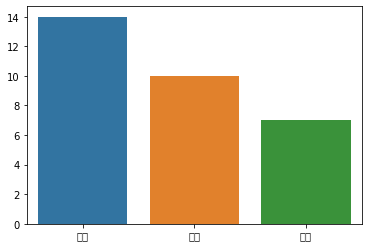

In [15]:
s = result['担当'].value_counts()
sns.barplot(x=s.index, y=s.values)

<AxesSubplot:>

C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 21213 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26408 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26681 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 23736 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\rouni\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 27941 missing from current font.
  font.set_text

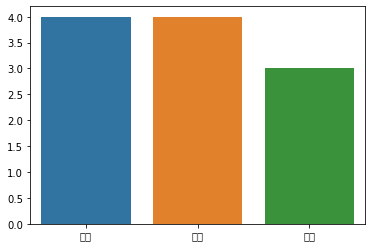

In [16]:
s = pd.Series(yasumi_dict)
sns.barplot(x=s.index, y=s.values)